# Imports

In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

# Data Read
df = pd.read_csv("DataFinal.csv")

## EDA

In [25]:
corr = df.corr()
corr.style.background_gradient(cmap='YlOrRd')
# profile = ProfileReport(df, title="Pandas Profiling Report", progress_bar=False)
# eda_filename = "report.html"
# profile.to_file(eda_filename)

,Feat0,Feat1,Feat2,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,PotentialBuyerHyperCrypto
Feat0,1.000000,-0.039633,0.023859,-0.008923,-0.049049,-0.033220,-0.012455,0.009814,-0.007110,-0.028196,-0.006155,-0.005293
Feat1,-0.039633,1.000000,0.030277,0.040114,-0.013127,0.012844,0.036842,0.037912,0.057861,-0.007072,-0.005147,-0.022530
Feat2,0.023859,0.030277,1.000000,-0.008627,-0.066468,0.000760,0.040986,0.000473,0.055493,0.031602,-0.029780,0.089447
Feat4,-0.008923,0.040114,-0.008627,1.000000,-0.001045,-0.020325,0.016779,0.004448,-0.003903,0.008604,0.026306,0.000959
Feat5,-0.049049,-0.013127,-0.066468,-0.001045,1.000000,0.004424,-0.002935,0.023419,-0.001186,0.015454,-0.000754,0.176224
Feat6,-0.033220,0.012844,0.000760,-0.020325,0.004424,1.000000,-0.022646,-0.000322,0.019584,0.055929,-0.010669,-0.007358
Feat7,-0.012455,0.036842,0.040986,0.016779,-0.002935,-0.022646,1.000000,0.074500,0.010640,0.013763,0.037763,0.005495
Feat8,0.009814,0.037912,0.000473,0.004448,0.023419,-0.000322,0.074500,1.000000,-0.007284,-0.009235,-0.051229,0.134106
Feat9,-0.007110,0.057861,0.055493,-0.003903,-0.001186,0.019584,0.010640,-0.007284,1.000000,0.006097,-0.019686,0.039892
Feat10,-0.028196,-0.007072,0.031602,0.008604,0.015454,0.055929,0.013763,-0.009235,0.006097,1.000000,-0.021014,-0.049023


Feat11  PotentialBuyerHyperCrypto
0       0                             76
        1                             46
1       0                            109
        1                             35
2       0                            101
        1                             44
3       0                            102
        1                             45
4       0                            109
        1                             38
5       0                            102
        1                             36
6       0                            140
7       0                            128
8       0                            125
9       0                            123
10      0                            141
Name: PotentialBuyerHyperCrypto, dtype: int64


<AxesSubplot:xlabel='Feat11,PotentialBuyerHyperCrypto'>

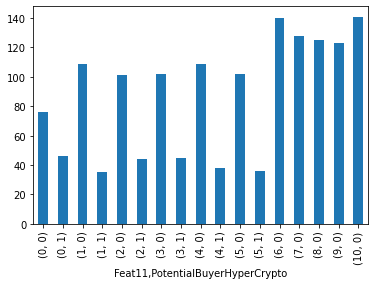

In [26]:
fd3 = df.groupby(['Feat11']).PotentialBuyerHyperCrypto.value_counts()
print(fd3)
fd3.plot(kind='bar', stacked=True)

## Handle Missing Data 

Only column Feat5 contains missing values. 57 rows have missing values in this column. We will be filling missing cells with mean value.

Feat5  PotentialBuyerHyperCrypto
0.0    0                             70
1.0    0                            148
       1                              1
2.0    0                            137
3.0    0                            110
       1                             26
4.0    0                            110
       1                             30
5.0    0                            118
       1                             37
6.0    0                            117
       1                             35
7.0    0                            112
       1                             31
8.0    0                            123
       1                             31
9.0    0                            107
       1                             23
10.0   0                             61
       1                             16
Name: PotentialBuyerHyperCrypto, dtype: int64


<AxesSubplot:xlabel='Feat5,PotentialBuyerHyperCrypto'>

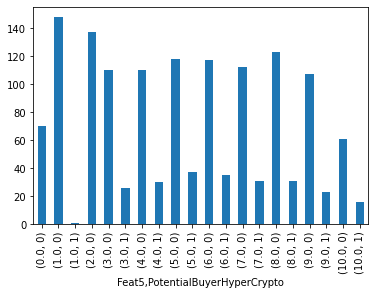

In [27]:
fd3 = df.groupby(['Feat5']).PotentialBuyerHyperCrypto.value_counts()
print(fd3)
fd3.plot(kind='bar', stacked=True)

Here we can see above that when Feat5 value is below 3, there is now 1 class and the count also decreaases when Feat5 value is greater than 7. So filling Feat5 with its mean values is good option

In [28]:
df = df.fillna(df.Feat5.mean())

# Outliers Detection and Removal 

We can see in below boxplot that Feat7 contains outliers. So we will remove those rows.

<AxesSubplot:>

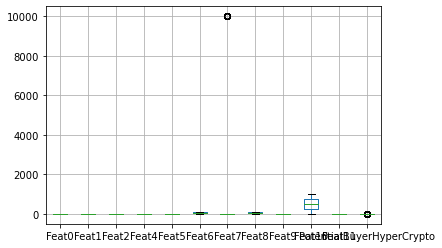

In [29]:
df.boxplot()

(1460, 13)


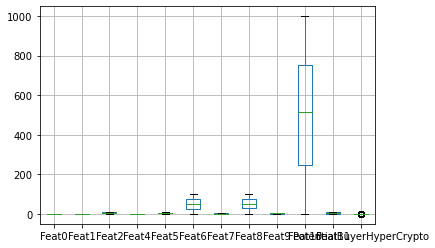

In [30]:
Feat7_mean = df['Feat7'].mean()
df_remove_outliers = df[df.Feat7 < Feat7_mean]
df_remove_outliers.boxplot()
print(df_remove_outliers.shape)

Shape of DataFrame (1460, 13)


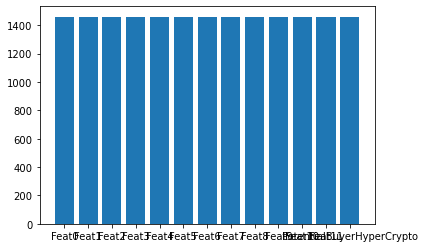

In [31]:
print("Shape of DataFrame", df_remove_outliers.shape)
count_dict = dict(df_remove_outliers.count())
plt.bar(range(len(count_dict)), count_dict.values(), align='center')
plt.xticks(range(len(count_dict)), list(count_dict.keys()))
plt.show()

In [32]:
df_remove_outliers.describe()

,Feat0,Feat1,Feat2,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,PotentialBuyerHyperCrypto
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.501971,0.485616,4.911726,0.503521,5.026299,50.267808,1.502740,51.302740,3.476712,500.049315,4.917808,0.162329
std,0.289997,0.499964,2.843094,0.290276,2.852079,29.123173,1.128176,28.475428,2.258213,290.304353,3.126326,0.368878
min,0.003947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250627,0.000000,2.520000,0.250000,3.000000,25.000000,0.000000,28.000000,2.000000,248.500000,2.000000,0.000000
50%,0.503861,0.000000,4.915000,0.500000,5.000000,50.500000,1.000000,51.000000,3.000000,514.000000,5.000000,0.000000
75%,0.752231,1.000000,7.340000,0.770000,7.000000,75.000000,3.000000,75.000000,5.000000,755.000000,8.000000,0.000000
max,0.999967,1.000000,10.000000,1.000000,10.000000,100.000000,3.000000,100.000000,7.000000,999.000000,10.000000,1.000000


Feat3 is a categorical column. In order to train model. We need to convert it to numerical. We will be using One-Hot encoding for this.

## One-hot Encoding of Feat3 

In [33]:
# enc = OneHotEncoder(handle_unknown='error')
# enc_column = enc.fit_transform(df_remove_outliers[['Feat3']]).toarray()
# column_name = enc.get_feature_names(['Feat3'])
# enc_df = pd.DataFrame(enc_column, columns=column_name)
# df_OHC = df_remove_outliers.join(enc_df)
# df_OHC = df_OHC.drop(['Feat3'], axis=1)
df_remove_outliers["Feat3"] = df_remove_outliers["Feat3"].map({"A":0, "B":1, "D":2})
df_OHC = df_remove_outliers

/var/folders/dy/z19pl9g142b25pylv_b95y0r0000gp/T/ipykernel_291/2307441981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove_outliers["Feat3"] = df_remove_outliers["Feat3"].map({"A":0, "B":1, "D":2})


In [34]:
df_OHC = pd.DataFrame(scaler.fit_transform(df_OHC.values), columns=df_OHC.columns, index=df_OHC.index)
df_OHC

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,PotentialBuyerHyperCrypto
0,0.272659,1.0,0.277,1.0,0.99,0.6,0.89,1.000000,0.46,1.000000,0.468468,1.0,0.0
1,0.362926,1.0,0.475,1.0,0.64,0.3,0.81,0.666667,0.27,1.000000,0.004004,0.1,1.0
2,0.281526,0.0,0.695,0.5,0.34,0.7,0.93,0.333333,0.29,0.000000,0.933934,0.7,0.0
3,0.354330,1.0,0.287,1.0,0.80,0.5,0.39,1.000000,0.61,1.000000,0.254254,0.2,0.0
4,0.460783,0.0,0.281,0.0,0.82,0.4,0.05,1.000000,0.75,0.571429,0.805806,0.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.982021,1.0,0.018,1.0,0.60,0.7,0.60,0.333333,0.76,0.428571,0.273273,1.0,0.0
1496,0.003366,0.0,0.476,0.0,0.76,0.1,0.82,1.000000,0.16,0.571429,0.932933,0.7,0.0
1497,0.814717,0.0,0.475,0.0,0.90,0.5,0.61,0.666667,0.77,0.000000,0.385385,0.4,1.0
1498,0.018536,1.0,0.786,1.0,0.56,0.8,0.35,0.666667,0.90,0.285714,0.131131,0.7,0.0


# Visualizations 

In [35]:
corr = df_OHC.corr()
corr.style.background_gradient(cmap='coolwarm')

,Feat0,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,Feat11,PotentialBuyerHyperCrypto
Feat0,1.000000,-0.042444,0.027914,-0.018388,-0.014611,-0.046694,-0.033206,-0.049633,0.007565,-0.008609,-0.028778,-0.013169,-0.000366
Feat1,-0.042444,1.000000,0.029850,-0.026642,0.030905,-0.008579,0.014504,-0.034562,0.032321,0.057679,-0.011173,-0.010404,-0.018921
Feat2,0.027914,0.029850,1.000000,-0.040487,-0.011300,-0.062236,0.001635,0.010384,-0.001433,0.053807,0.034517,-0.034164,0.087810
Feat3,-0.018388,-0.026642,-0.040487,1.000000,0.015405,-0.028210,0.039716,0.000350,0.001365,0.029679,-0.007861,0.011264,0.021152
Feat4,-0.014611,0.030905,-0.011300,0.015405,1.000000,0.007401,-0.020607,0.024081,-0.002224,-0.003545,0.000588,0.018347,0.008037
Feat5,-0.046694,-0.008579,-0.062236,-0.028210,0.007401,1.000000,0.003869,-0.044883,0.024465,0.001226,0.011715,-0.002081,0.174004
Feat6,-0.033206,0.014504,0.001635,0.039716,-0.020607,0.003869,1.000000,-0.033598,0.002520,0.014388,0.055184,-0.008904,-0.003092
Feat7,-0.049633,-0.034562,0.010384,0.000350,0.024081,-0.044883,-0.033598,1.000000,-0.015515,0.041456,0.006466,0.040678,-0.052949
Feat8,0.007565,0.032321,-0.001433,0.001365,-0.002224,0.024465,0.002520,-0.015515,1.000000,-0.006616,-0.005586,-0.055100,0.129802
Feat9,-0.008609,0.057679,0.053807,0.029679,-0.003545,0.001226,0.014388,0.041456,-0.006616,1.000000,0.004319,-0.024542,0.046093


In [36]:
df_OHC.columns

Index(['Feat0', 'Feat1', 'Feat2', 'Feat3', 'Feat4', 'Feat5', 'Feat6', 'Feat7',
       'Feat8', 'Feat9', 'Feat10', 'Feat11', 'PotentialBuyerHyperCrypto'],
      dtype='object')

## Feature Selection 

In [37]:
all_columns = ['Feat0', 'Feat1', 'Feat2', 'Feat3', 'Feat4', 'Feat5', 'Feat6', 'Feat7',
       'Feat8', 'Feat9', 'Feat10', 'Feat11']
to_remove = ['Feat0', 'Feat1', 'Feat4', 'Feat6', 'Feat7']
df_final = df_OHC.drop(to_remove, axis=1)
# df_final = df_OHC

## Train-Test Split 

In [38]:
X = df_final.loc[:, df_final.columns != 'PotentialBuyerHyperCrypto']
y = df_final['PotentialBuyerHyperCrypto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Feat2,Feat3,Feat5,Feat8,Feat9,Feat10,Feat11
259,0.771,0.5,0.8,0.34,0.571429,0.882883,0.7
1100,0.560,1.0,0.8,0.88,0.000000,0.063063,0.8
656,0.184,1.0,0.7,0.11,0.285714,0.277277,0.8
818,0.810,1.0,0.6,0.46,0.857143,0.930931,0.7
389,0.502,0.5,0.1,0.15,0.000000,0.432432,0.6
...,...,...,...,...,...,...,...
1129,0.667,0.0,0.9,0.83,0.142857,0.448448,0.3
1166,0.216,0.0,0.8,0.74,0.285714,0.652653,0.4
1332,0.756,1.0,0.2,0.98,0.857143,0.036036,0.8
882,0.441,1.0,0.7,0.11,0.857143,0.668669,0.3


# Best Classifier

## Decision Trees

Accuracy of Decison Trees is 0.9828767123287672 and F1 Score is 0.9578509772222062


/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


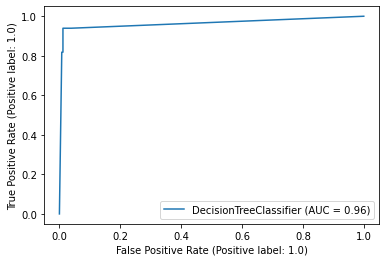

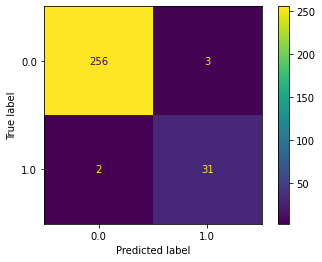

In [39]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=10, criterion='entropy',
                                  splitter='best', min_samples_split=5, min_samples_leaf=3,
                                 max_features=None)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
f1Score_dt = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy of Decison Trees is {accuracy_dt} and F1 Score is {f1Score_dt}")
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# Tested Models

## Random Forest 

Accuracy of Random Forest is 0.976027397260274 and F1 Score is 0.9409913681110886


/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


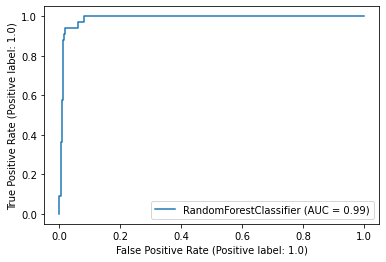

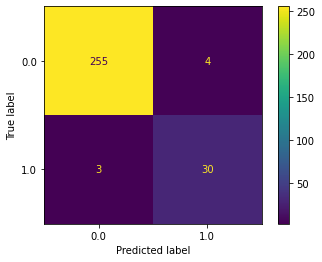

In [40]:
rfc = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=3,
                            n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
f1Score_rf = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy of Random Forest is {accuracy_rf} and F1 Score is {f1Score_rf}")
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

##  Gradient Boosted Trees  

Accuracy of Gradient Boosted Trees is 0.976027397260274 and F1 Score is 0.9409913681110886


/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


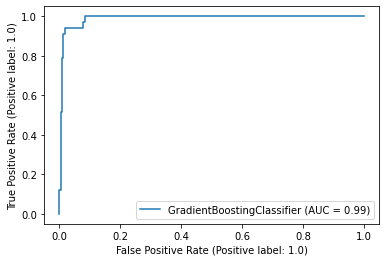

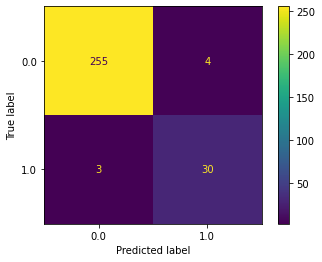

In [41]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred)
f1Score_db = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy of Gradient Boosted Trees is {accuracy_gb} and F1 Score is {f1Score_db}")
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## SVM

Accuracy of SVM is 0.9212328767123288 and F1 Score is 0.7691699604743083


/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


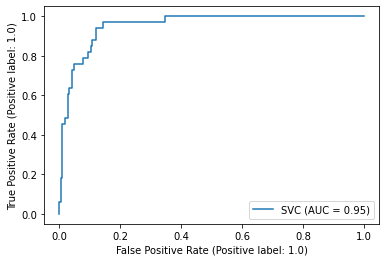

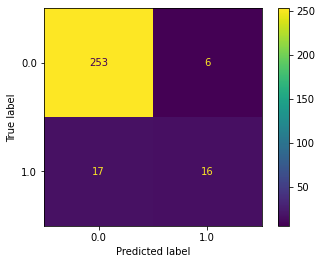

In [42]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
f1Score_svc = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy of SVM is {accuracy_svc} and F1 Score is {f1Score_svc}")
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

## Neural Network 

Accuracy of Neural Network is 0.8904109589041096 and F1 Score is 0.6839826839826839


/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


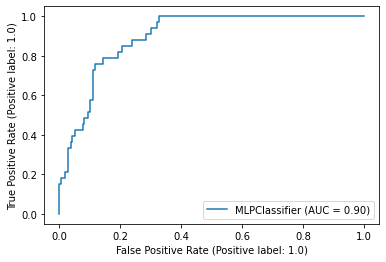

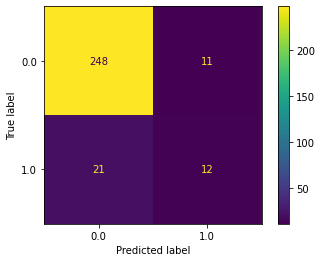

In [43]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred)
f1Score_nn = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy of Neural Network is {accuracy_nn} and F1 Score is {f1Score_nn}")
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Logistic Regression 

Accuracy of Logistic Regression is 0.8767123287671232 and F1 Score is 0.6062921348314607


/Users/work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


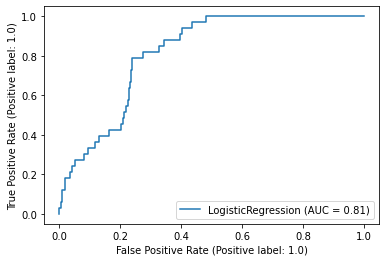

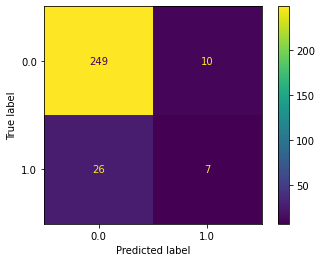

In [44]:
clf = LogisticRegression(random_state=42, solver='lbfgs', max_iter=100).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
f1Score_lr = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy of Logistic Regression is {accuracy_lr} and F1 Score is {f1Score_lr}")
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [22]:
print(f"Accuracy of Gradient Boosted Trees is {accuracy_gb} and F1 Score is {f1Score_db}")
print(f"Accuracy of Decision Tree is {accuracy_dt} and F1 Score is {f1Score_dt}")
print(f"Accuracy of Random Forest is {accuracy_rf} and F1 Score is {f1Score_rf}")
print(f"Accuracy of SVM is {accuracy_svc} and F1 Score is {f1Score_svc}")
print(f"Accuracy of Neural Network is {accuracy_nn} and F1 Score is {f1Score_nn}")
print(f"Accuracy of Logistic Regression is {accuracy_lr} and F1 Score is {f1Score_lr}")

Accuracy of Gradient Boosted Trees is 0.976027397260274 and F1 Score is 0.9409913681110886
Accuracy of Decision Tree is 0.9828767123287672 and F1 Score is 0.9578509772222062
Accuracy of Random Forest is 0.976027397260274 and F1 Score is 0.9409913681110886
Accuracy of SVM is 0.9212328767123288 and F1 Score is 0.7691699604743083
Accuracy of Neural Network is 0.9041095890410958 and F1 Score is 0.7234848484848485
Accuracy of Logistic Regression is 0.8767123287671232 and F1 Score is 0.6062921348314607


In [23]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.
